In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#font 오류 수정

font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [14]:

df = pd.read_csv('data/1차전처리합본.csv')
df.head()

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,21시,22시,23시,일일 이용자수 합계(평균),승차총승객수,하차총승객수,승차총승객수 일일 평균,하차총승객수 일일 평균,버스승객수 일일 평균,승객 1인 대비 쉼터 이용률
0,S_0042_SJ00,군자교남단,2022-05-20,4216,소형,0,0,0,0,27,...,58,37,25,3122,75573,93671,207.049315,256.632877,463.682192,6.733060
1,S_0040_HD02,논골신협대림아파트후문,2022-05-20,4560,소형,0,0,0,0,5,...,99,59,40,4339,86350,127326,236.575342,348.838356,585.413699,7.411853
2,S_0037_SS12,뚝섬역 2번출구,2022-05-20,4237,소형,0,0,0,0,12,...,79,77,51,1809,128403,54475,351.789041,149.246575,501.035616,3.610522
3,S_0019_SS23,뚝섬역3번5번출구(성수역),2020-12-18,4238,중형,1,1,1,41,1437,...,3833,3131,1541,72837,139795,96655,383.000000,264.808219,647.808219,112.436054
4,S_0038_SS12,뚝섬역 4번출구,2022-05-20,4239,소형,1,0,0,0,17,...,167,160,82,4964,114677,123837,314.183562,339.279452,653.463014,7.596451


In [28]:
df1 = pd.read_csv('data/서울시버스정류소위치정보(20230914).csv')

df1.rename(columns={'ARS_ID' : '아이디'}, inplace=True)
drop = ['NODE_ID', '정류소명']
df2 = df1.drop(columns=drop)
df2.head()

newdf = df.merge(df2, on='아이디', how='inner')
newdf.head()


,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,일일 이용자수 합계(평균),승차총승객수,하차총승객수,승차총승객수 일일 평균,하차총승객수 일일 평균,버스승객수 일일 평균,승객 1인 대비 쉼터 이용률,X좌표,Y좌표,정류소타입
0,S_0042_SJ00,군자교남단,2022-05-20,4216,소형,0,0,0,0,27,...,3122,75573,93671,207.049315,256.632877,463.682192,6.733060,127.072438,37.557542,일반차로
1,S_0040_HD02,논골신협대림아파트후문,2022-05-20,4560,소형,0,0,0,0,5,...,4339,86350,127326,236.575342,348.838356,585.413699,7.411853,127.024574,37.557703,일반차로
2,S_0037_SS12,뚝섬역 2번출구,2022-05-20,4237,소형,0,0,0,0,12,...,1809,128403,54475,351.789041,149.246575,501.035616,3.610522,127.046846,37.547575,일반차로
3,S_0019_SS23,뚝섬역3번5번출구(성수역),2020-12-18,4238,중형,1,1,1,41,1437,...,72837,139795,96655,383.000000,264.808219,647.808219,112.436054,127.049272,37.546482,일반차로
4,S_0038_SS12,뚝섬역 4번출구,2022-05-20,4239,소형,1,0,0,0,17,...,4964,114677,123837,314.183562,339.279452,653.463014,7.596451,127.049270,37.546800,일반차로


In [30]:
newdf.to_csv('data/2차전처리합본.csv', encoding='utf-8 sig', index =False)

In [34]:
import pandas as pd

# '크기' 열의 값이 '중형'인 데이터프레임 생성
중형_newdf = newdf[newdf['크기'] == '중형']

# '크기' 열의 값이 '소형'인 데이터프레임 생성
소형_newdf = newdf[newdf['크기'] == '소형']
소형_newdf.head()

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,일일 이용자수 합계(평균),승차총승객수,하차총승객수,승차총승객수 일일 평균,하차총승객수 일일 평균,버스승객수 일일 평균,승객 1인 대비 쉼터 이용률,X좌표,Y좌표,정류소타입
0,S_0042_SJ00,군자교남단,2022-05-20,4216,소형,0,0,0,0,27,...,3122,75573,93671,207.049315,256.632877,463.682192,6.733060,127.072438,37.557542,일반차로
1,S_0040_HD02,논골신협대림아파트후문,2022-05-20,4560,소형,0,0,0,0,5,...,4339,86350,127326,236.575342,348.838356,585.413699,7.411853,127.024574,37.557703,일반차로
2,S_0037_SS12,뚝섬역 2번출구,2022-05-20,4237,소형,0,0,0,0,12,...,1809,128403,54475,351.789041,149.246575,501.035616,3.610522,127.046846,37.547575,일반차로
4,S_0038_SS12,뚝섬역 4번출구,2022-05-20,4239,소형,1,0,0,0,17,...,4964,114677,123837,314.183562,339.279452,653.463014,7.596451,127.049270,37.546800,일반차로
5,S_0034_MJ00,마장역,2022-05-20,4117,소형,0,0,0,1,17,...,9142,161890,70431,443.534247,192.961644,636.495890,14.363015,127.042325,37.565583,일반차로


In [37]:
newdf[newdf['버스정류소명']=='응봉동주민센터(응봉사거리)']

,지점코드,버스정류소명,설치일,아이디,크기,00시,01시,02시,03시,04시,...,일일 이용자수 합계(평균),승차총승객수,하차총승객수,승차총승객수 일일 평균,하차총승객수 일일 평균,버스승객수 일일 평균,승객 1인 대비 쉼터 이용률,X좌표,Y좌표,정류소타입
30,S_0008_EB00,응봉동주민센터(응봉사거리),2020-07-31,4138,중형,25,7,13,5,97,...,92095,89554,87309,245.353425,239.20274,484.556164,190.060527,127.033501,37.553399,일반차로


* 소형 크기 중 승객 1인 대비 이용자가 많은 쉼터 위치

In [36]:
# '승객 1인 대비 쉼터 이용률' 열에서 값이 큰 10개의 행 가져오기
top_3_rows = 소형_newdf.nlargest(10, '승객 1인 대비 쉼터 이용률')

# 결과 출력
top_3_rows['정류소타입']

21    일반차로
18    일반차로
16    마을버스
5     일반차로
39    일반차로
19    마을버스
36    일반차로
13    일반차로
9     일반차로
4     일반차로
Name: 정류소타입, dtype: object

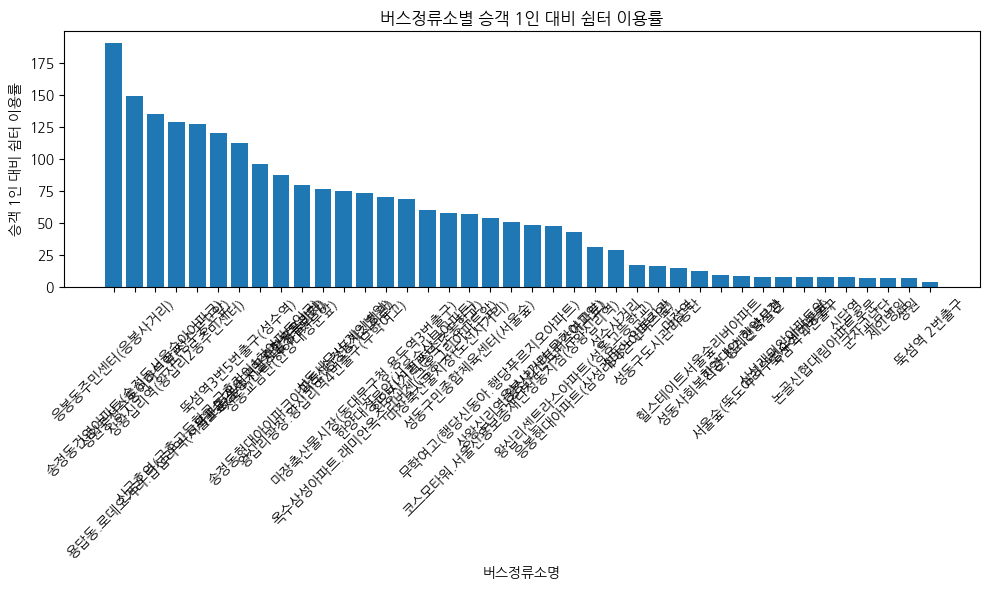

In [7]:
# 막대 그래프 그리기

plt.figure(figsize=(10, 6))  # 그래프 크기 조정 (선택사항)
df = df.sort_values(by='승객 1인 대비 쉼터 이용률', ascending=False)
plt.bar(df['버스정류소명'], df['승객 1인 대비 쉼터 이용률'])
plt.xlabel('버스정류소명')
plt.ylabel('승객 1인 대비 쉼터 이용률')
plt.title('버스정류소별 승객 1인 대비 쉼터 이용률')

plt.xticks(rotation=45)  # x축 레이블을 45도로 회전 (선택사항)

plt.tight_layout()  # 그래프 간격 조정 (선택사항)
plt.show()

In [ ]:
df = df.sort_values(by='승객 1인 대비 쉼터 이용률', ascending=False)
df

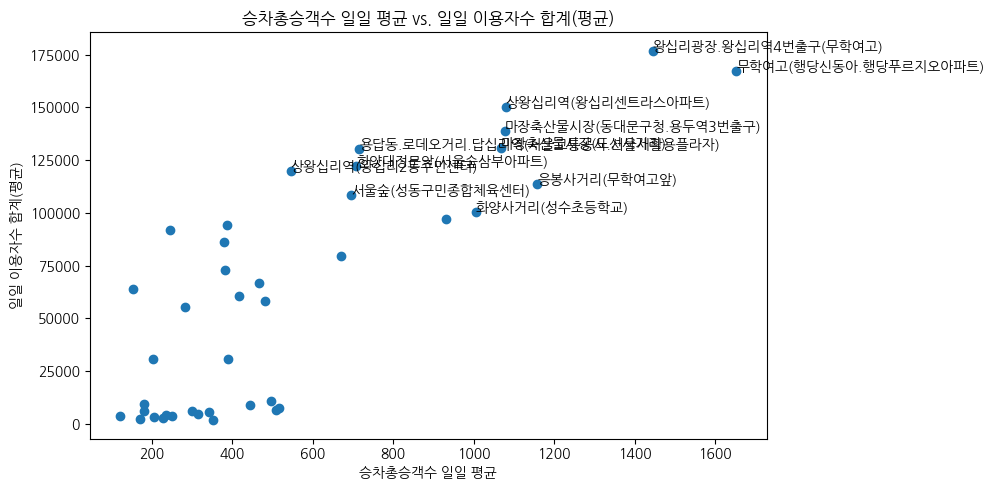

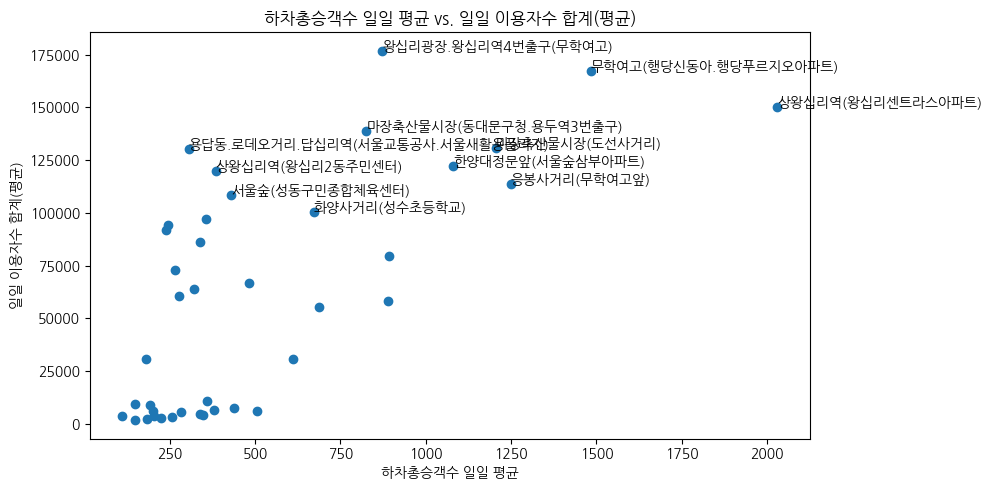

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font 오류 수정
font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)

# 승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.figure(figsize=(10, 5))
plt.scatter(newdf['승차총승객수 일일 평균'], newdf['일일 이용자수 합계(평균)'])
plt.title('승차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('승차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')

# 각 점에 '버스정류소명' 표시 (일일 이용자수 합계 평균이 100,000을 넘는 경우만)
for i, txt in enumerate(newdf['버스정류소명']):
    if newdf['일일 이용자수 합계(평균)'][i] > 100000:
        plt.annotate(txt, (newdf['승차총승객수 일일 평균'][i], newdf['일일 이용자수 합계(평균)'][i]))

plt.tight_layout()
plt.show()

# 하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)
plt.figure(figsize=(10, 5))
plt.scatter(newdf['하차총승객수 일일 평균'], newdf['일일 이용자수 합계(평균)'])
plt.title('하차총승객수 일일 평균 vs. 일일 이용자수 합계(평균)')
plt.xlabel('하차총승객수 일일 평균')
plt.ylabel('일일 이용자수 합계(평균)')

# 각 점에 '버스정류소명' 표시 (일일 이용자수 합계 평균이 100,000을 넘는 경우만)
for i, txt in enumerate(newdf['버스정류소명']):
    if newdf['일일 이용자수 합계(평균)'][i] > 100000:
        plt.annotate(txt, (newdf['하차총승객수 일일 평균'][i], newdf['일일 이용자수 합계(평균)'][i]))

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font 오류 수정
font_list = fm.findSystemFonts()
font_name = None
for font in font_list:
    if 'NanumGothic' in font:
        font_name = fm.FontProperties(fname=font).get_name()
plt.rc('font', family=font_name)
data = pd.read_csv('data/2차전처리합본.csv')

c:\Users\123\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\123\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


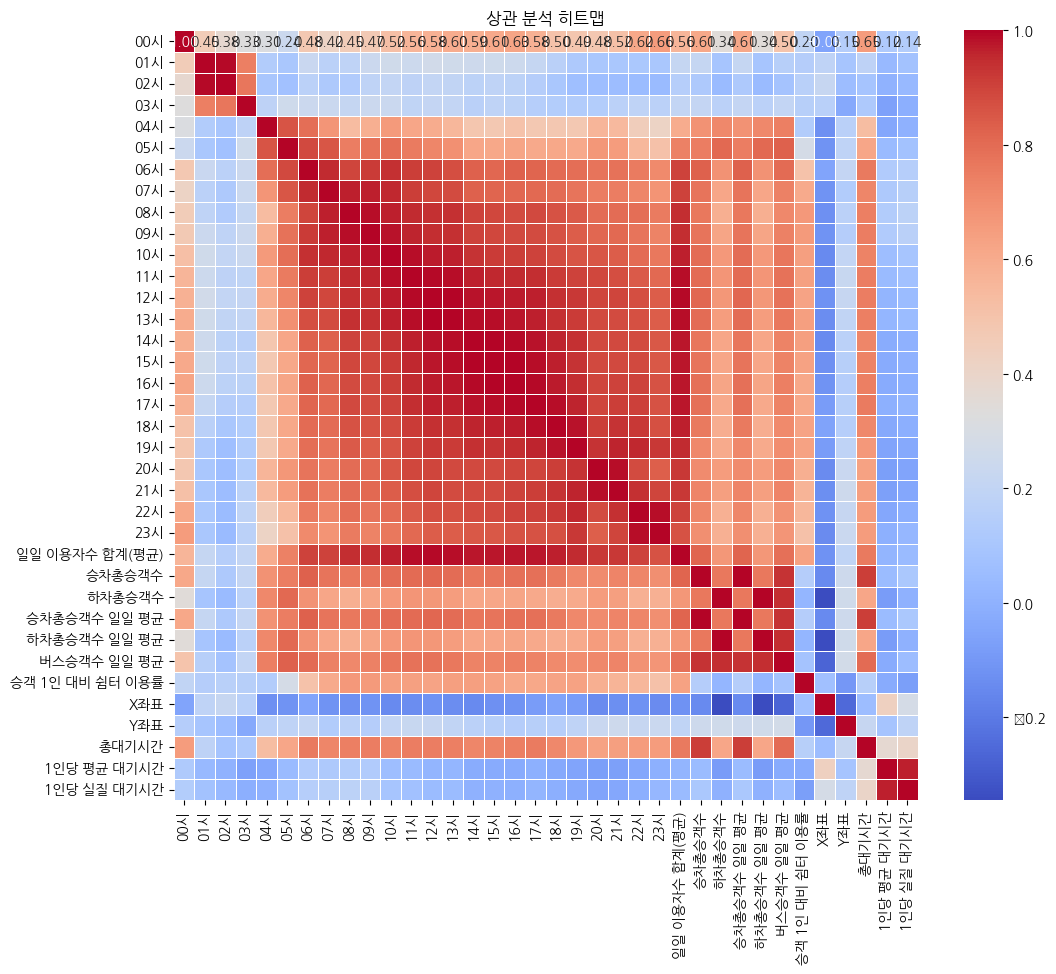

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 열 추출 (iloc 사용)
selected_columns = data.iloc[:, 6:42]

# 상관 행렬 계산
correlation_matrix = selected_columns.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("상관 분석 히트맵")
plt.show()


In [21]:
correlation_matrix['일일 이용자수 합계(평균)']

00시                0.561884
01시                0.216569
02시                0.151083
03시                0.202440
04시                0.598717
05시                0.737719
06시                0.904304
07시                0.901325
08시                0.942604
09시                0.947363
10시                0.968310
11시                0.984965
12시                0.992259
13시                0.987600
14시                0.978373
15시                0.975066
16시                0.976329
17시                0.975077
18시                0.964243
19시                0.952570
20시                0.921192
21시                0.925969
22시                0.904679
23시                0.866237
일일 이용자수 합계(평균)     1.000000
승차총승객수             0.817153
하차총승객수             0.673684
승차총승객수 일일 평균       0.817153
하차총승객수 일일 평균       0.673684
버스승객수 일일 평균        0.788280
승객 1인 대비 쉼터 이용률    0.635826
X좌표               -0.124182
Y좌표                0.194862
총대기시간              0.758333
1인당 평균 대기시간        0.013588
1인당 실질 대기시간        0